In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('fin.csv')

In [3]:
df.shape

(1048575, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [6]:
df['isFraud'].value_counts(normalize=True)*100

isFraud
0    99.89109
1     0.10891
Name: proportion, dtype: float64

In [7]:
df = df.drop_duplicates()
df = df.drop(['nameOrig', 'nameDest'], axis=1) #useless as they don't help in ml

In [8]:
df.shape

(1048575, 9)

In [9]:
df = df.sample(n=5000, random_state=42).reset_index(drop=True)
print("New dataset shape:", df.shape)               #as it's a really large dataset , we will take only first 5000 rows

New dataset shape: (5000, 9)


In [10]:
df.shape

(5000, 9)

In [11]:
df['isFraud'].value_counts(normalize=True)*100

isFraud
0    99.86
1     0.14
Name: proportion, dtype: float64

In [12]:
df['type'].value_counts()

type
CASH_OUT    1752
PAYMENT     1716
CASH_IN     1071
TRANSFER     420
DEBIT         41
Name: count, dtype: int64

In [13]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,39,TRANSFER,574748.85,106088.00,0.00,0.00,574748.85,0,0
1,43,CASH_IN,21118.84,10500000.00,10500000.00,2689219.94,2668101.10,0,0
2,43,CASH_IN,26551.78,20562.93,47114.71,0.00,0.00,0,0
3,39,PAYMENT,7819.09,0.00,0.00,0.00,0.00,0,0
4,36,CASH_OUT,312914.21,0.00,0.00,1310916.68,1623830.88,0,0


In [14]:
df[df['isFraud'] == 1].head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
147,84,CASH_OUT,152331.26,152331.26,0.0,676868.23,829199.49,1,0
417,34,CASH_OUT,71693.42,71693.42,0.0,0.00,71693.42,1,0
577,64,CASH_OUT,31574.65,31574.65,0.0,199385.83,230960.48,1,0
731,43,TRANSFER,29988.00,29988.00,0.0,0.00,0.00,1,0
3360,7,CASH_OUT,5460002.91,5460002.91,0.0,0.00,9281535.44,1,0


handeling missing values


In [15]:
#first we will look for any null values
df.isnull().sum()   #nope...no null values

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
#but if they appear , what we can do is 
#1. df.dropna()                         dropped rows(if only some of the rows have missing values)
#2. df.drop(['col_name'] , axis=1)      dropping columns if one column has many missing vlues , or the column as whole is useless to ml.
#3. df['col_name'] = df['col_name'].fillna(df['col_name'].m())     filling in values with the mean / mode / median of that column
                                                                   # mean --> numeric data normally distributed 
                                                                   # median --> numeric with outliers
                                                                   # mode --> categorical data


handeling outliers

In [17]:
num_cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
print(df[num_cols].describe().T)   #T stands for transpose
print('\n')
for c in num_cols:
    q95 = df[c].quantile(0.95)
    q99 = df[c].quantile(0.99)
    q999 = df[c].quantile(0.999)
    print(f"{c}: 95%={q95:.2f}, 99%={q99:.2f}, 99.9%={q999:.2f}")  #rounded upto 2 decimal points
print('\n')

#we'll use IQR for detecting outliers
# IQR method: returns boolean Series if row is outlier for that col
def iqr_outlier_mask(series, k=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return (series < lower) | (series > upper)

# check counts
for c in num_cols:
    mask = iqr_outlier_mask(df[c])
    print(c, "IQR outliers:", mask.sum(), f"({mask.mean():.2%})")

                 count          mean           std   min        25%  \
amount          5000.0  1.581727e+05  2.862330e+05  1.45  11773.505   
oldbalanceOrg   5000.0  8.800118e+05  2.915451e+06  0.00      0.000   
newbalanceOrig  5000.0  8.970300e+05  2.951093e+06  0.00      0.000   
oldbalanceDest  5000.0  9.438663e+05  2.174107e+06  0.00      0.000   
newbalanceDest  5000.0  1.086614e+06  2.312604e+06  0.00      0.000   

                       50%           75%          max  
amount           73456.675  2.096344e+05   7567170.36  
oldbalanceOrg    16937.245  1.460700e+05  38400000.00  
newbalanceOrig       0.000  1.763639e+05  38400000.00  
oldbalanceDest  102696.310  8.726441e+05  29600000.00  
newbalanceDest  199602.295  1.112626e+06  30000000.00  


amount: 95%=527440.61, 99%=1275233.71, 99.9%=3215182.75
oldbalanceOrg: 95%=6154574.62, 99%=15505000.00, 99.9%=25100700.00
newbalanceOrig: 95%=6317943.71, 99%=15605000.00, 99.9%=25400900.00
oldbalanceDest: 95%=4742034.37, 99%=10703000.0

In [18]:
import matplotlib.pyplot as plt

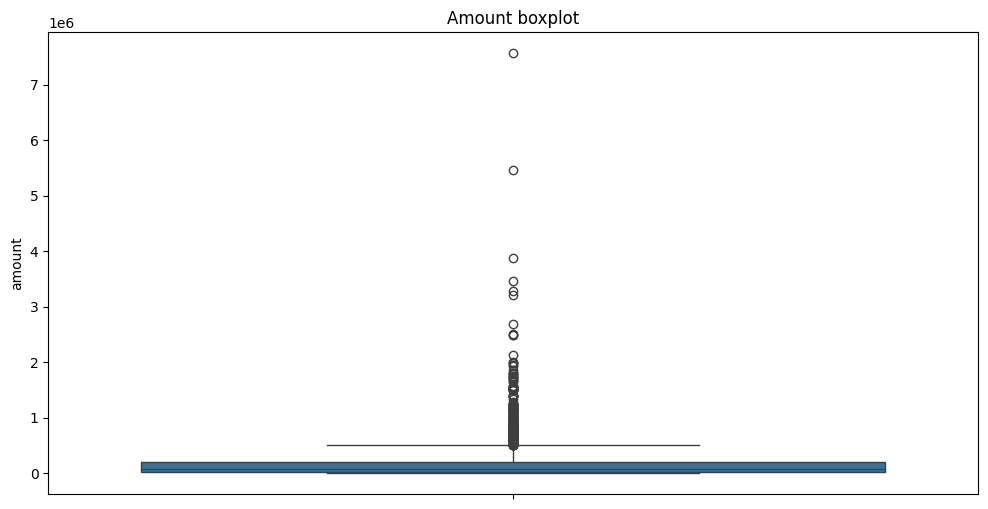

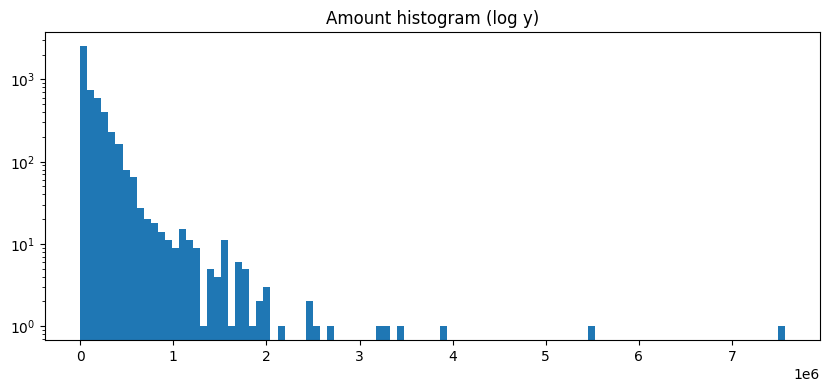

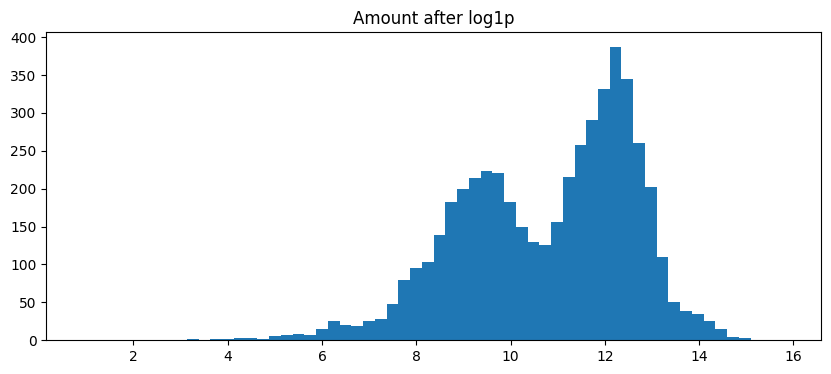

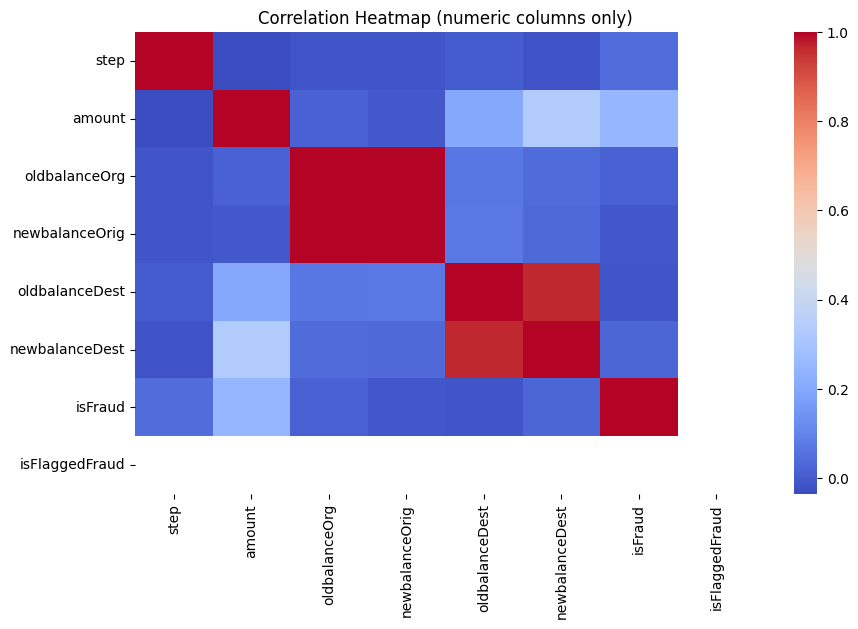

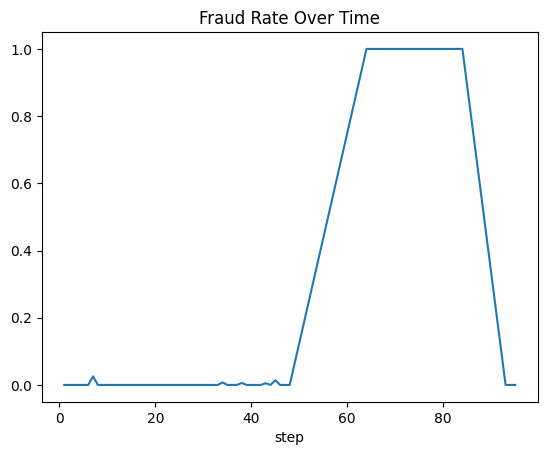

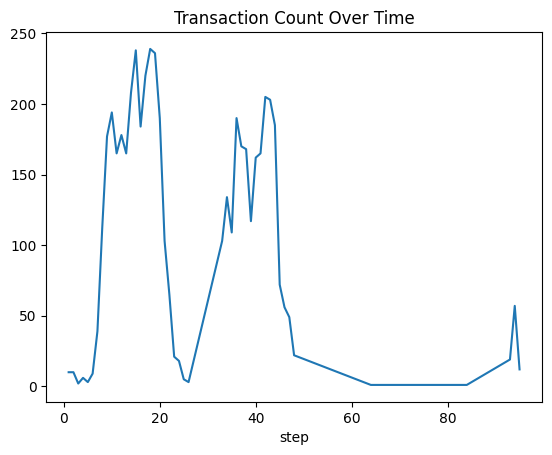

In [19]:
# boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df['amount'])
plt.title('Amount boxplot')
plt.show()

# histogram (log scale view)
plt.figure(figsize=(10,4))
plt.hist(df['amount'], bins=100)
plt.yscale('log')   # if very skewed use log scale for y
plt.title('Amount histogram (log y)')
plt.show()

# histogram after log transform (to inspect shape)
plt.figure(figsize=(10,4))
plt.hist(np.log1p(df['amount']), bins=60)
plt.title('Amount after log1p')
plt.show()


#heatmap

# Correlation heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (numeric columns only)")
plt.show()


#over time
df.groupby('step')['isFraud'].mean().plot()
plt.title("Fraud Rate Over Time")
plt.show()

df['step'].value_counts().sort_index().plot()
plt.title("Transaction Count Over Time")
plt.show()


In [20]:

#Financial data naturally contains extreme outliers
#These high-value transactions are important for fraud detection
#Removing them would harm the model’s ability to detect real fraud
#as we can see the log transformation works very well , so we will keep a seprate log transformmed col and use it instead of the amount column
#also the amount after log transformation histograms indicates need for feature scaling

df['amount_log'] = np.log1p(df['amount'])

In [21]:
#oldbalanceOrg <--> newbalanceOrig --> Very high positive correlation
#oldbalanceDest <--> newbalanceDest --> Very high positive correlation
#amount has moderate correlation with destination balances
#isFraud has very weak linear correlation with most features
#i.e a simple linear model won't help we will need complex models

#Dataset is heavily imbalanced over time.
#Early time steps dominate training data.
#Later steps have Fewer transactions But higher fraud rate
#Under-learning of fraud patterns in later steps
# that's why Use SMOTE or class weights

In [22]:
# for other numeric column also we'll take their log transformmed values

for c in ['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']:
    df[c + '_log'] = np.log1p(df[c])

In [23]:
#Cap values at e.g. 99th or 99.9th percentile
#Keeping all data points But limiting their influence

def cap_series(series, lower_quantile=0.001, upper_quantile=0.999):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# example: cap amount at 99.9%
df['amount_capped'] = cap_series(df['amount'], 0.001, 0.999)


In [24]:
# create flag if an amount is in top 0.1%
th = df['amount'].quantile(0.999)
df['amount_is_top_0.1pct'] = (df['amount'] > th).astype(int)


datatype correction

In [25]:
df['type'] = df['type'].astype('category')   #as only the type column is categorical

introducing new feature columns

In [26]:
df['diffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorBalanceDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']

splitting into train and test and scaling

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# split (use stratify for imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y    # stratify =y ensures both training and testing sets keep the same fraud ratio.
)


In [34]:
#as model1 wasn't being evalated correctly , Corrected Data Split for Reliable Evaluation
# Corrected split for Experiment-2
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,        # increased test size
    random_state=42,
    stratify=y
)

print("Train class distribution:\n", y_train.value_counts())
print("\nTest class distribution:\n", y_test.value_counts())


Train class distribution:
 isFraud
0    2996
1       4
Name: count, dtype: int64

Test class distribution:
 isFraud
0    1997
1       3
Name: count, dtype: int64


scaling the numeric columns and encoding the categorical

In [35]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


# numeric columns to scale
num_cols = ['amount_log','oldbalanceOrg_log','newbalanceOrig_log',
            'oldbalanceDest_log','newbalanceDest_log']

# categorical columns to encode
cat_cols = ['type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ],
    remainder='passthrough'
)

fit transform on training data

In [36]:
# fit transform training data
X_train_processed = preprocessor.fit_transform(X_train)

# transform test data (NO fit here!) to avoid data lekage
X_test_processed = preprocessor.transform(X_test)

In [37]:
# RESTORE FEATURE NAMES AFTER ONE-HOT + SCALING (FOR SHAP) 

num_features = num_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols).tolist()

passthrough_features = [
    col for col in X.columns if col not in num_cols + cat_cols
]

feature_names = num_features + cat_features + passthrough_features

# convert back to DataFrame (important for SHAP & feature importance)
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed  = pd.DataFrame(X_test_processed,  columns=feature_names)


using SMOTE for imbalanced data 

In [38]:
#The dataset used in this project is highly imbalanced, with fraudulent transactions forming a very small fraction of the total data.
#To address this issue, SMOTE (Synthetic Minority Oversampling Technique) was applied to the training dataset after preprocessing. 
#SMOTE generates new synthetic samples of the minority class based on feature similarity, allowing the model to learn meaningful fraud patterns. 
#It was applied only to the training data to avoid data leakage and preserve the natural class distribution in the test set

In [39]:
sm = SMOTE(random_state=42, k_neighbors=2)
X_train_bal, y_train_bal = sm.fit_resample(X_train_processed, y_train)    #i.e now our training data has equal fraud and non fraud cases

print("\nAfter SMOTE balancing:")
print(y_train_bal.value_counts())


After SMOTE balancing:
isFraud
0    2996
1    2996
Name: count, dtype: int64


In [40]:
#for task2


X_train_bal.to_csv("X_train_task2.csv", index=False)
y_train_bal.to_csv("y_train_task2.csv", index=False)

X_test_processed.to_csv("X_test_task2.csv", index=False)
y_test.to_csv("y_test_task2.csv", index=False)

pd.Series(feature_names).to_csv("feature_names_task2.csv", index=False)
